# Project Report:2
A company project named.

“MOVIE RATING PREDICTION WITH PYTHON”

Project Report Submitted in Partial fulfilment of the requirement for 
the internship.

data analytics internship

Submitted by 

JITENDRA KUMAR

Reg email :- Jitusolanki321@gmail.com
  
 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_data = pd.read_csv('/kaggle/input/movie-data/movie-data.csv', encoding="latin1")

In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# check missing value or NULL values

In [6]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [8]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [14]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [15]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [16]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# convert votes to integer and remove commas and convert year (2019) to 2019 and remove min from duration columns

# convert votes columns

In [19]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','')

# convert year columns

In [21]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(str)
plt.show()

# convert duration columns

In [22]:
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [23]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [24]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), object(9)
memory usage: 649.5+ KB


In [25]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Now data are clean and inputed.

2. EDA (Exploratory data Analysis)

Top 10 Movies

@ find top 10 movies based on rating

In [26]:
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]

In [27]:
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


Distribution of Top 10 movies wrt Year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

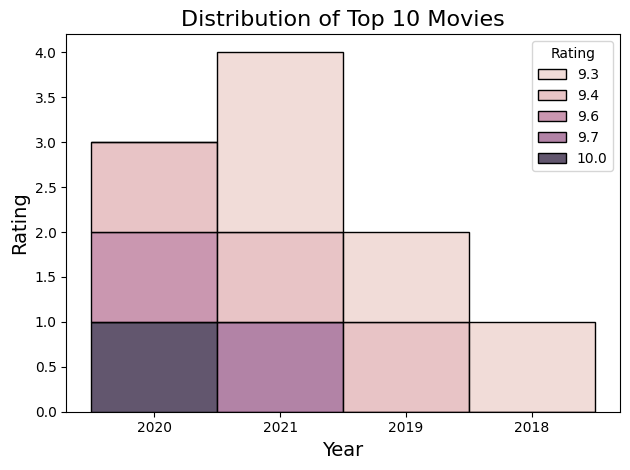

In [42]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()

Distribution of Genre of movies

In [29]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


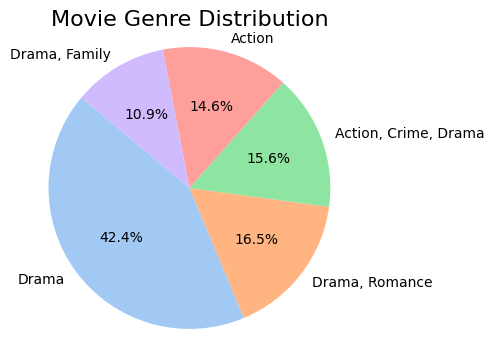

In [30]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

Distribution of Top directors by average rating

# Group the data by director and calculate the average rating

In [31]:
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)
top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


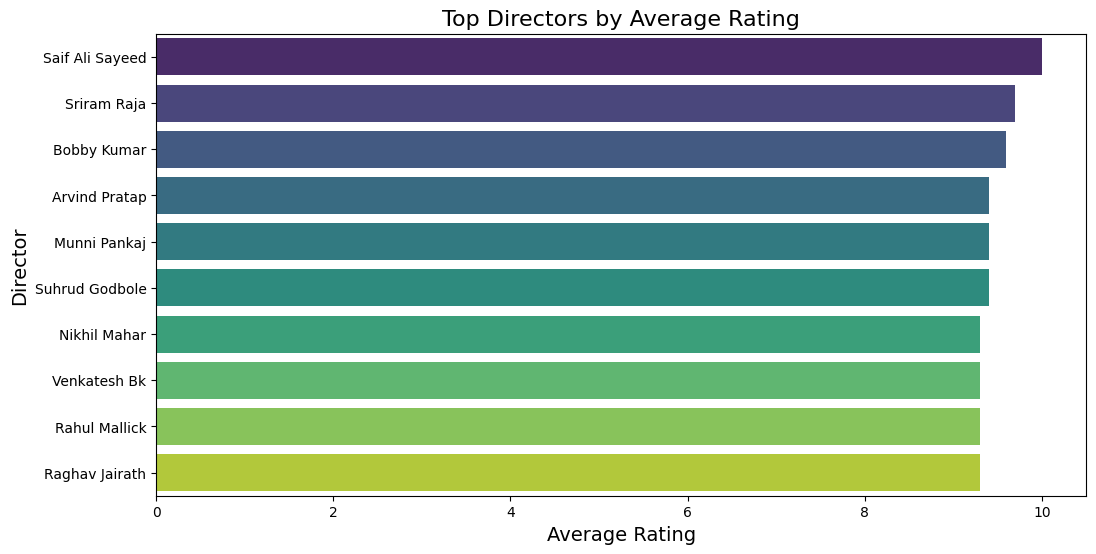

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

Relationship between the number of votes and movie ratings

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


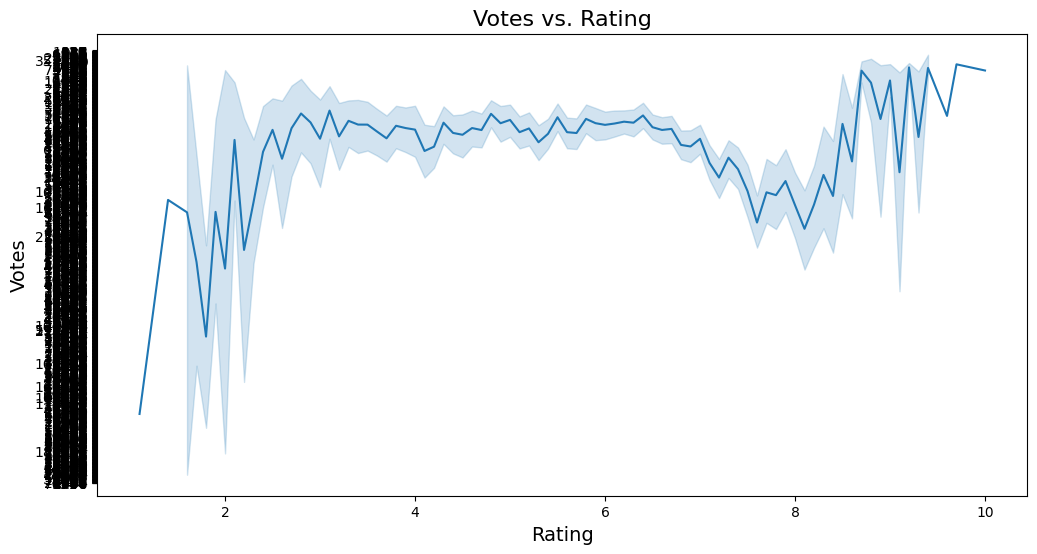

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

Distribution of top actors by number of movie

In [34]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


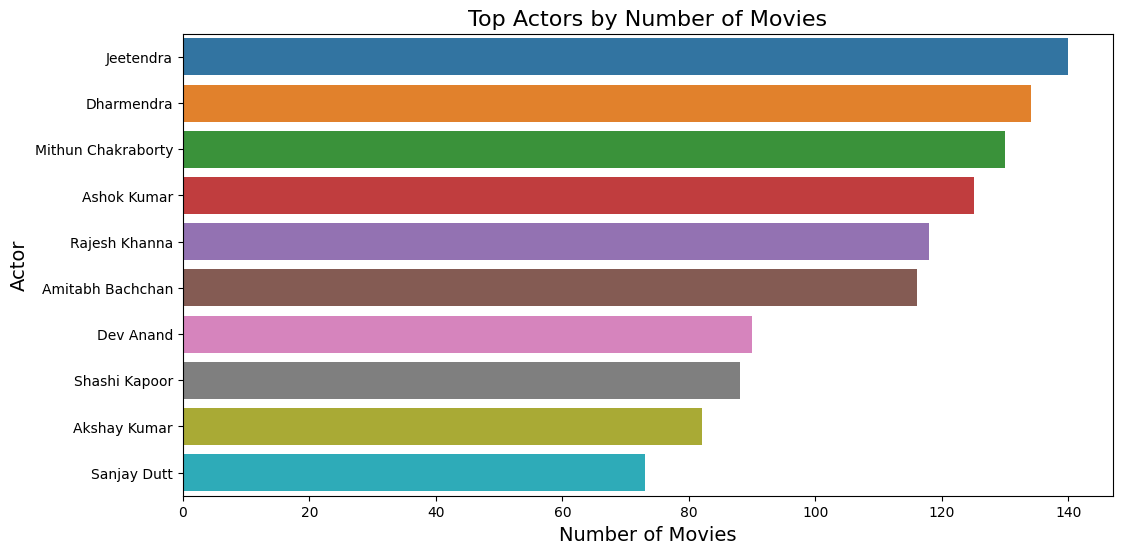

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.show()

# Distribution of number of movie released every year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


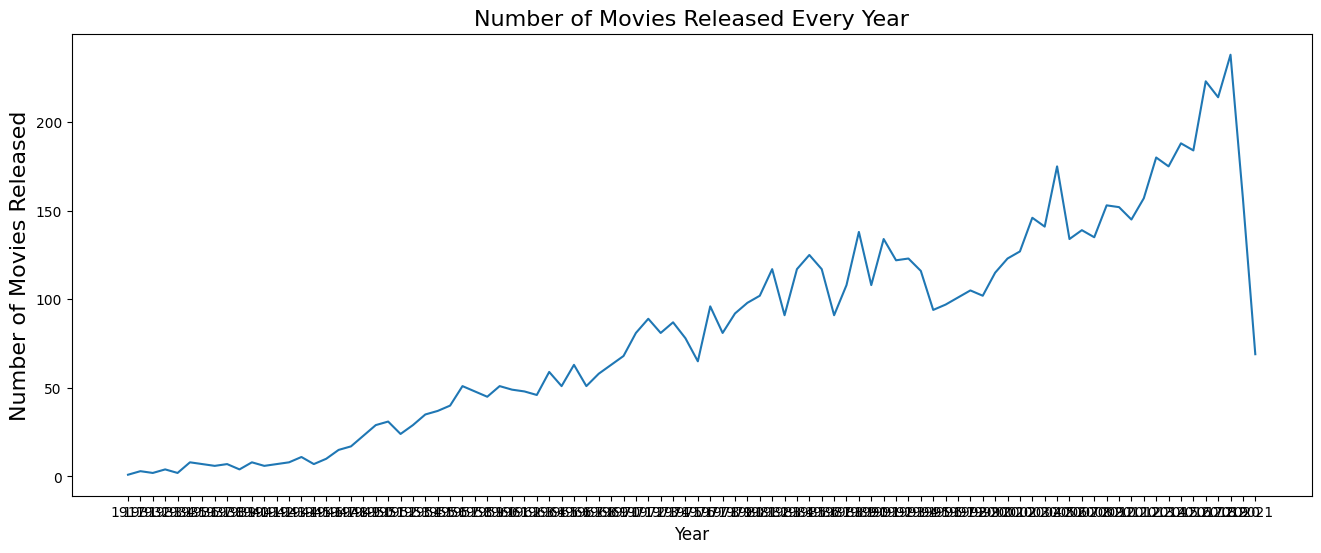

In [37]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)

plt.xlabel('Year', fontsize=12)

plt.ylabel('Number of Movies Released', fontsize=16)
plt.show()

Distribution of Movies with rating greater than 8 and votes greater than 10000

In [68]:
movie_data['Duration'] = movie_data['Duration'].astype(float)

In [73]:
movie_data['year'] = movie_data['Year'].astype(float)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: Cannot interpret '2030' as a data type

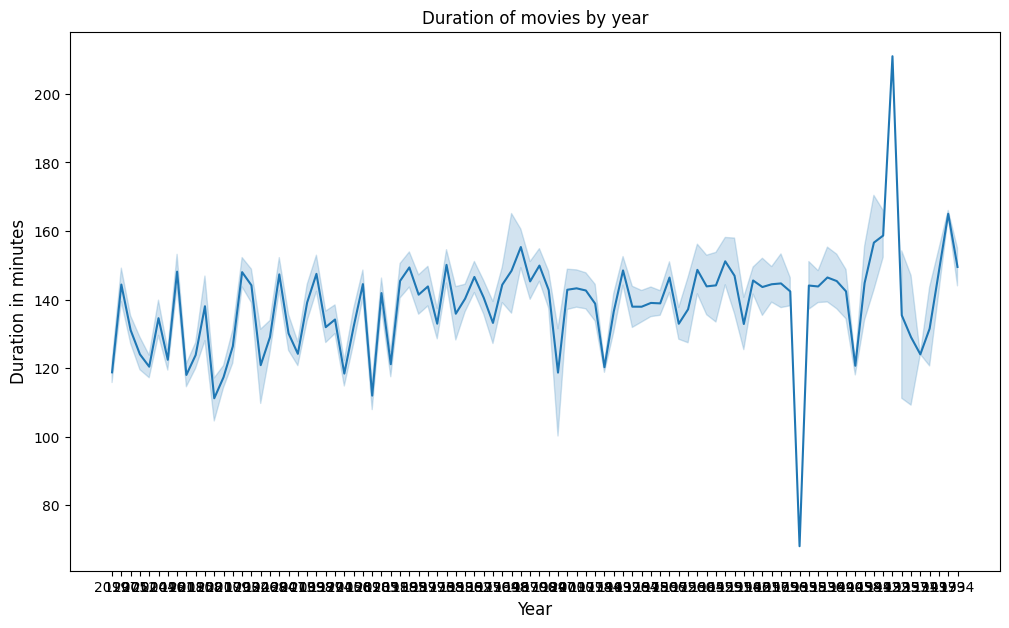

In [90]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=movie_data,x='Year',y='Duration')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Duration in minutes',fontsize=12)
plt.title('Duration of movies by year',fontsize=12)
plt.xticks(np.arange(1990,2000,2020,2030))
plt.show()


Distribution of Number of movies each genre

In [55]:
movie_data['Genre'] = movie_data['Genre'].str.split(',')

Create a new DataFrame with one row for each genre

In [56]:
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, ' Drama'),
  Text(2, 0, 'Action'),
  Text(3, 0, ' Romance'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, ' Crime'),
  Text(6, 0, ' Thriller'),
  Text(7, 0, ' Family'),
  Text(8, 0, ' Comedy'),
  Text(9, 0, ' Musical'),
  Text(10, 0, 'Crime'),
  Text(11, 0, ' Mystery'),
  Text(12, 0, 'Romance'),
  Text(13, 0, ' Adventure'),
  Text(14, 0, 'Horror'),
  Text(15, 0, 'Adventure'),
  Text(16, 0, ' Fantasy'),
  Text(17, 0, 'Thriller'),
  Text(18, 0, 'Musical'),
  Text(19, 0, ' History'),
  Text(20, 0, 'Biography'),
  Text(21, 0, ' Horror'),
  Text(22, 0, 'Family'),
  Text(23, 0, 'Mystery'),
  Text(24, 0, ' Music'),
  Text(25, 0, 'Fantasy'),
  Text(26, 0, 'Documentary'),
  Text(27, 0, ' Action'),
  Text(28, 0, 'Animation'),
  Text(29, 0, ' Sport'),
  Text(30, 0, ' Biography'),
  Text

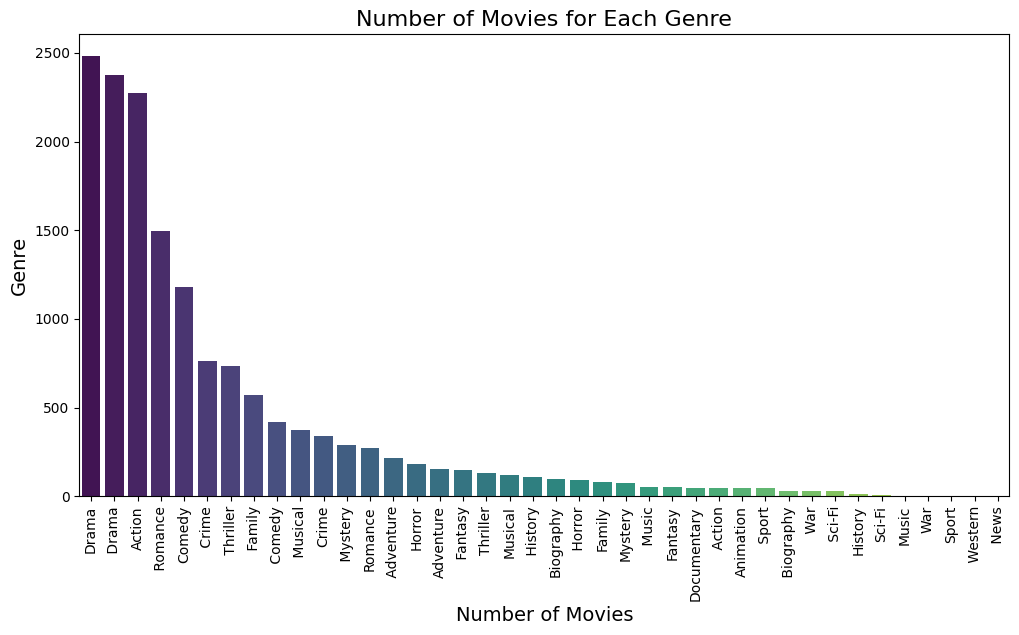

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Distribution of Average rating of movies in each genre

In [92]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()

In [93]:
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

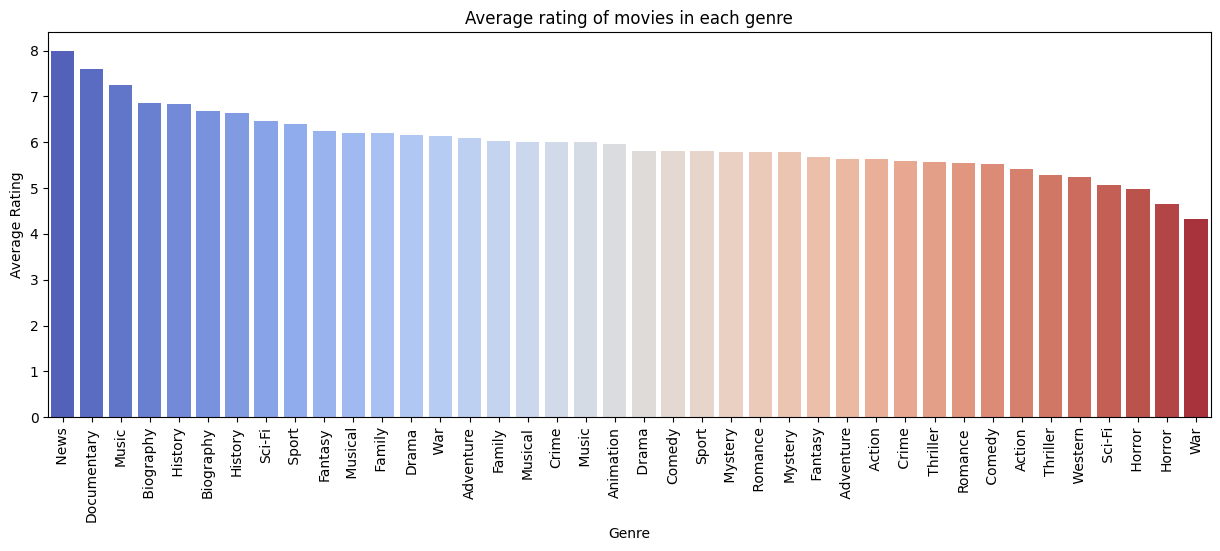

In [94]:
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

Featured Engineering

In [95]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = movie_data.drop(['Name'],axis=1)

# Transform Director columns

In [96]:
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])

# Transform Actors Columns

In [97]:
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))

In [98]:
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,year
1,2019,109.0,252,7.0,8,755,1686,2725,373,2019.0
3,2019,110.0,205,4.4,35,1637,1500,865,2543,2019.0
5,1997,147.0,175,4.7,827,1881,481,84,2422,1997.0
6,2005,142.0,315,7.4,1086,2486,878,1346,2996,2005.0
8,2012,82.0,351,5.6,326,161,2385,1416,1189,2012.0


In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

In [100]:
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,year
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102,0.980769
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274,0.980769
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340,0.769231
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779,0.846154
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409,0.913462


Examine Correlation of Data

# correlation

In [101]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration    0.001839
Director   -0.003678
year       -0.194990
Name: Rating, dtype: float64

<Axes: >

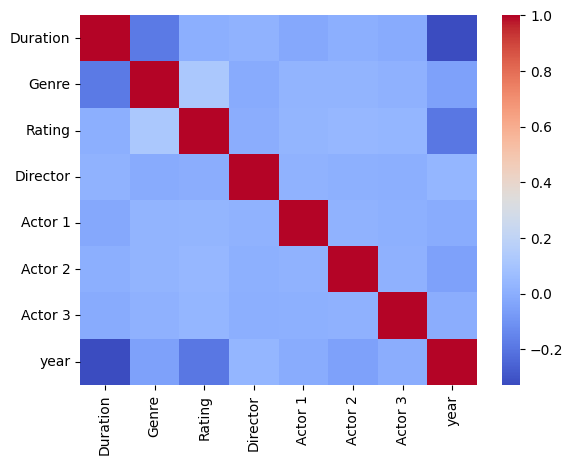

In [102]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

Now our transformed columns are much correlated with the target variable so we are ready to go

Model Building

# Import modeling Libraries

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# put data except Rating data

In [106]:
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data

In [109]:
y = trans_data['Rating']

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [149]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [153]:
LinearRegression()

LinearRegression()

In [128]:
X_test = np.array(X_test)

In [133]:
X_test

array([['1969', 104.0, 234, ..., 1447, 2657, 1969.0],
       ['1975', 118.0, 306, ..., 1940, 110, 1975.0],
       ['1974', 133.0, 265, ..., 1185, 2657, 1974.0],
       ...,
       ['2015', 95.0, 346, ..., 292, 2734, 2015.0],
       ['1949', nan, 5, ..., 2310, 2588, 1949.0],
       ['1958', 173.0, 201, ..., 1191, 286, 1958.0]], dtype=object)

In [180]:
y_pred = np.array(y_test)

In [168]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
